                                           MACHINE LEARNING PROJECT

                                             LOAN STATUS APPROVAL 

Import the dependencies/Libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Data collection and preprocessing

In [113]:
#Loading the dataset to pandas data frame
data=pd.read_csv("C:/Users/Lezan/Documents/msc-2 sem/MACHINE LEARNING PROJECT/Group9_final.csv")

In [114]:
#Type of data frame
type(data)

pandas.core.frame.DataFrame

In [115]:
#Displaing the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [116]:
#Printing the first five rows of the data frame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
#Number of rows and columns
data.shape

(614, 13)

In [118]:
print("No of rows:",data.shape[0])
print("No of columns:",data.shape[1])

No of rows: 614
No of columns: 13


In [119]:
'''information on total number of rows,columns,data 
   type of each column and memory requirement '''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [120]:
#statistical measures
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [121]:
#Number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
#Total missing values
data.isnull().sum().sum()

149

In [123]:
#percentage of missing values in each column
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [124]:
#List of columns having missing values less than 5%.
columns=['Gender','Married','Dependents','LoanAmount','Loan_Amount_Term']

In [125]:
#Dropping the above listed columns
data=data.dropna(subset=columns)

In [126]:
#Percentage of missing values in the columns
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [127]:
#Finding out the mode of Self_Employed column
data['Self_Employed'].mode()[0]

'No'

In [128]:
#Filling the Self_Employed column with its mode
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [129]:
#Percentage of missing values in the columns
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
#Finding out the mode of Credit_History column
data['Credit_History'].mode()[0]

1.0

In [20]:
#Filling the Credit_History column with its mode
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
#Percentage of missing values in the columns
data.isnull().sum()*100/len(data)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [22]:
#Displaying the dataframe after treating the missing values
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
#Finding out shape of the dataframe after treating the missing values.
data.shape

(553, 13)

In [24]:
#Statistical measures
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.764919,5350.018083,1659.119204,146.001808,341.663653,0.871609
std,1.008514,5965.429068,3043.448229,84.052035,65.555451,0.334827
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2889.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.000000,1213.000000,128.000000,360.000000,1.000000
75%,2.000000,5815.000000,2306.000000,170.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [25]:
#Displaing any 5 random rows of the dataframe
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
468,LP002502,Female,Yes,2.0,Not Graduate,No,210,2917.0,98.0,360.0,1.0,Semiurban,Y
527,LP002706,Male,Yes,1.0,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y
58,LP001198,Male,Yes,1.0,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban,Y
87,LP001282,Male,Yes,0.0,Graduate,No,2500,2118.0,104.0,360.0,1.0,Semiurban,Y
110,LP001385,Male,No,0.0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y


Converting categorical columns to numeric cloumns

In [26]:
#Finding unique values from Dependents column
data['Dependents'].unique()

array([1., 0., 2., 3.])

In [27]:
#Finding unique values from Loan_Status column
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
#Finding unique values from Gender column
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
#Label encoding of the categorical columns
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data['Married']=data['Married'].map({'No':0,'Yes':1})
data['Education']=data['Education'].map({'Graduate':0,'Not Graduate':1})
data['Self_Employed']=data['Self_Employed'].map({'No':1,'Yes':0})
data['Property_Area']=data['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})

In [30]:
#Converting class values to numerical values
data['Loan_Status']=data['Loan_Status'].map({'N':0,'Y':1})

In [31]:
#Displaying data after label encoding.
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1.0,0,1,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0.0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0.0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0.0,0,1,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2.0,0,0,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0.0,0,1,2900,0.0,71.0,360.0,1.0,2,1
610,LP002979,0,1,3.0,0,1,4106,0.0,40.0,180.0,1.0,2,1
611,LP002983,0,1,1.0,0,1,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,0,1,2.0,0,1,7583,0.0,187.0,360.0,1.0,0,1


In [32]:
#Displaying first 5 records of the data frame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1.0,0,1,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0.0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0.0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0.0,0,1,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2.0,0,0,5417,4196.0,267.0,360.0,1.0,0,1


In [33]:
#Displaing 5 random rows of the dataframe
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
134,LP001487,0,0,0.0,0,1,4895,0.0,102.0,360.0,1.0,1,1
29,LP001087,1,0,2.0,0,1,3750,2083.0,120.0,360.0,1.0,1,1
569,LP002841,0,1,0.0,0,1,3166,2064.0,104.0,360.0,0.0,0,0
465,LP002494,0,0,0.0,0,1,6000,0.0,140.0,360.0,1.0,2,1
258,LP001859,0,1,0.0,0,1,14683,2100.0,304.0,360.0,1.0,2,0


In [34]:
#Finding out the count of unique values in the class 
data['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

Graphical Representation

Univariate Analysis for Numerical Variables

Text(0, 0.5, 'Count')

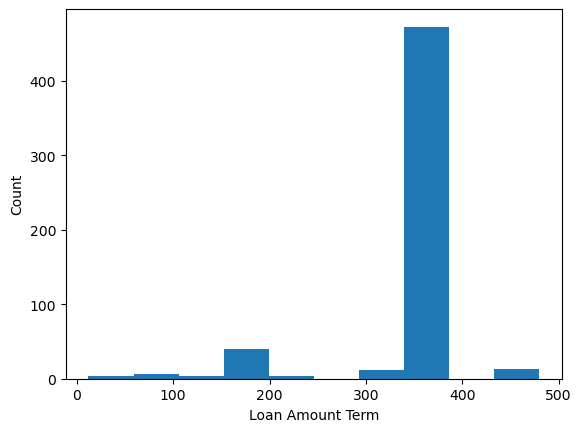

In [131]:
#Histogram => Loan_Amount_Term
plt.hist(data["Loan_Amount_Term"])
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

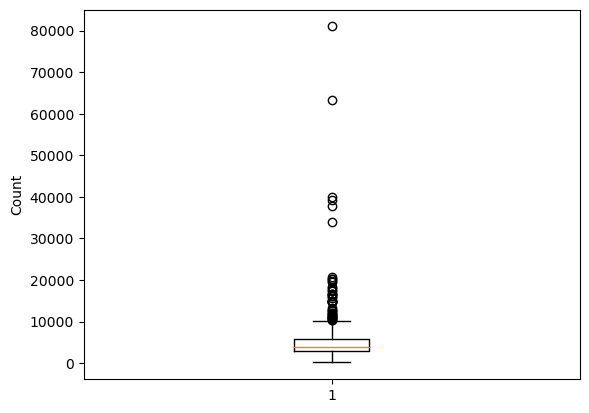

In [36]:
# Boxplot => Applicant Income
plt.boxplot(data["ApplicantIncome"])
plt.ylabel("Count")

Text(0, 0.5, 'Count')

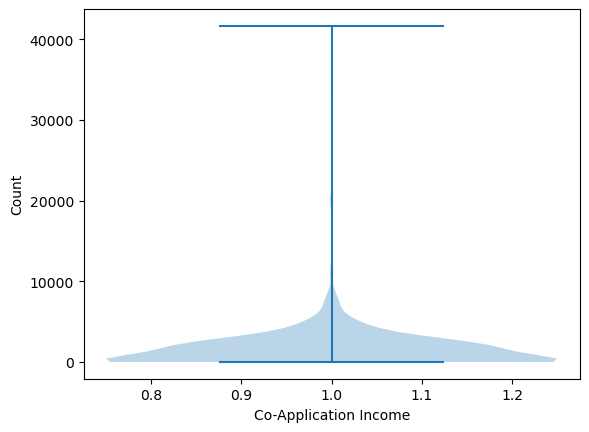

In [37]:
# Violinplot => Co Applicant Income
plt.violinplot(data["CoapplicantIncome"])
plt.xlabel("Co-Application Income")
plt.ylabel("Count")

Univariate Analysis for categorical  Variables

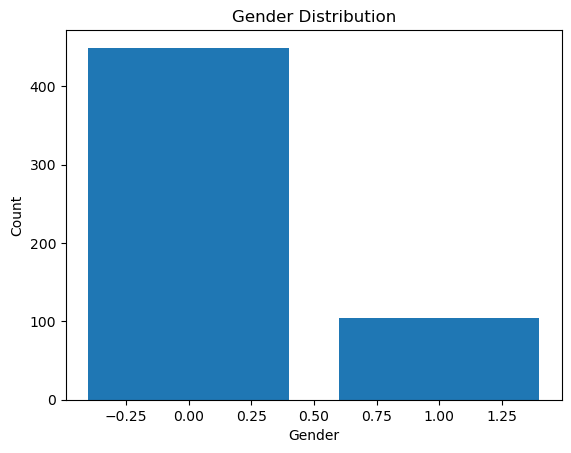

In [38]:
# Bar graph => Gender
gender_counts = data['Gender'].value_counts()
plt.bar(gender_counts.index,gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Dependents Distribution')

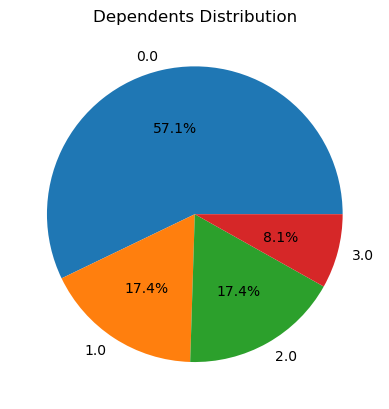

In [39]:
# Pie chart => Dependents
dependents = data['Dependents'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title("Dependents Distribution")

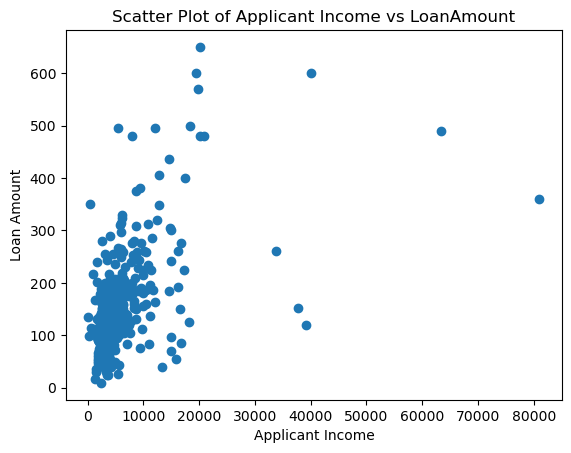

In [40]:
# Scatterplot => Applicant Income & Loan Amount
plt.scatter(data['ApplicantIncome'], data['LoanAmount'])
plt.title("Scatter Plot of Applicant Income vs LoanAmount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

Text(0.5, 0.98, 'Joint plot of Loan Amount & Applicant Income')

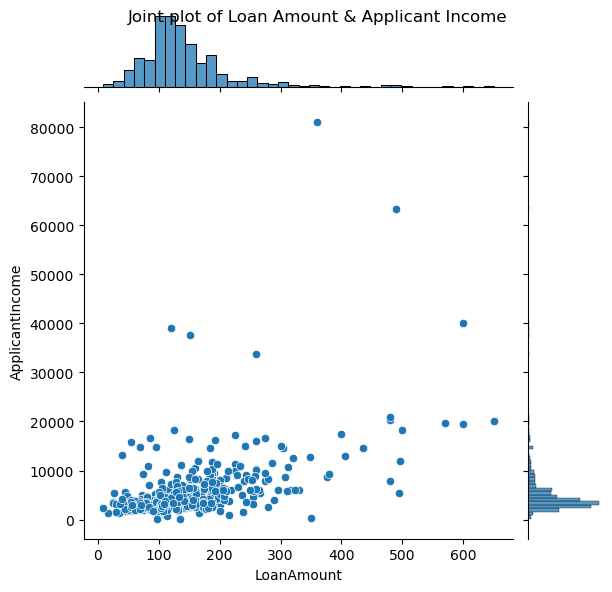

In [41]:
# Jointplot => ApplicantIncome & Loan Amount
sns.jointplot(data, x="LoanAmount", y="ApplicantIncome", kind="scatter")
plt.suptitle("Joint plot of Loan Amount & Applicant Income")

Bivariate Analysis for Categorical Variables

<Axes: xlabel='Education', ylabel='count'>

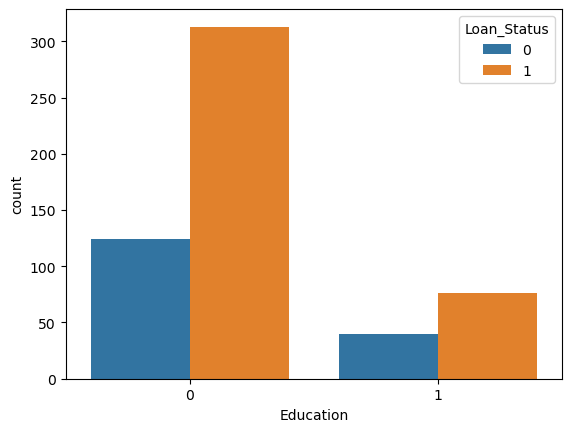

In [42]:
# Countplot => Education & Loan Status
sns.countplot(data, x="Education", hue="Loan_Status")

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

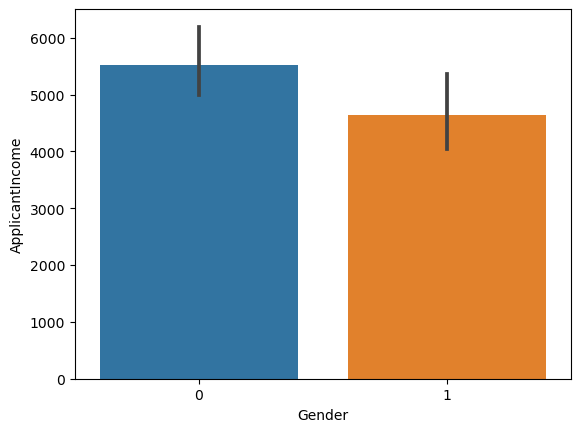

In [43]:
# Barplot => Gender & Application Income
sns.barplot(data, x="Gender", y="ApplicantIncome")

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

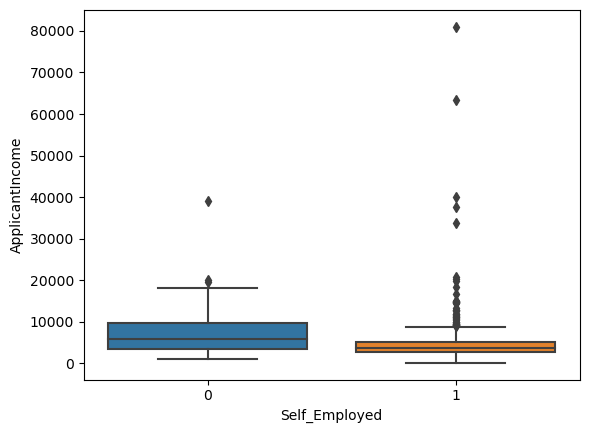

In [44]:
# Boxplot => Self Employed & Application Income
sns.boxplot(data, x="Self_Employed", y="ApplicantIncome")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

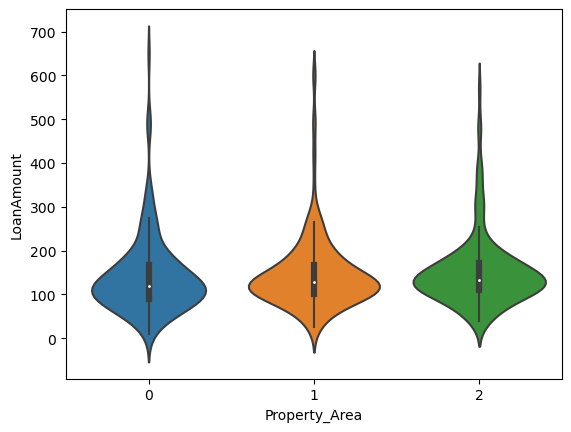

In [45]:
# Violinplot => Property Area & Loan Amount
sns.violinplot(data, x="Property_Area", y="LoanAmount")

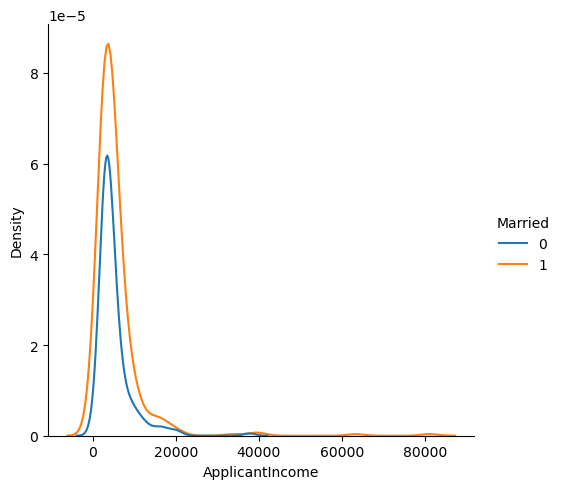

In [46]:
# Displot => Applicant Income & Married
sns.displot(data, x= "ApplicantIncome", hue="Married", kind="kde")

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap for all Numerial Variables')

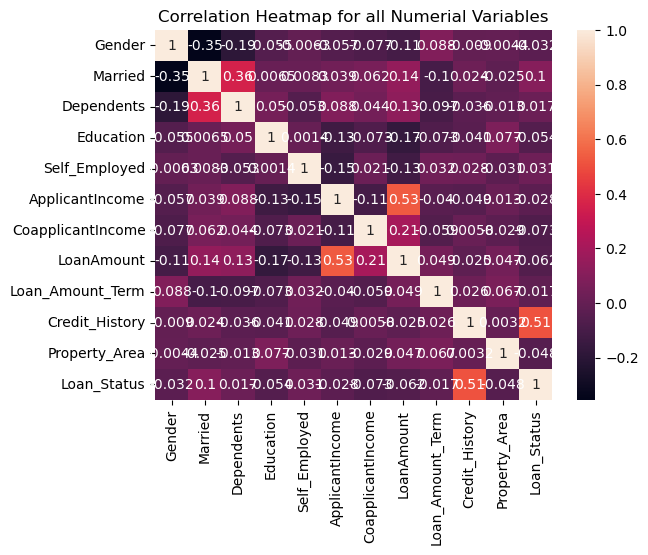

In [47]:
#Heatmap => All numerical data 
num_df = data.select_dtypes(include=['number']) 
sns.heatmap(num_df.corr(), annot=True)
plt.title("Correlation Heatmap for all Numerial Variables")

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

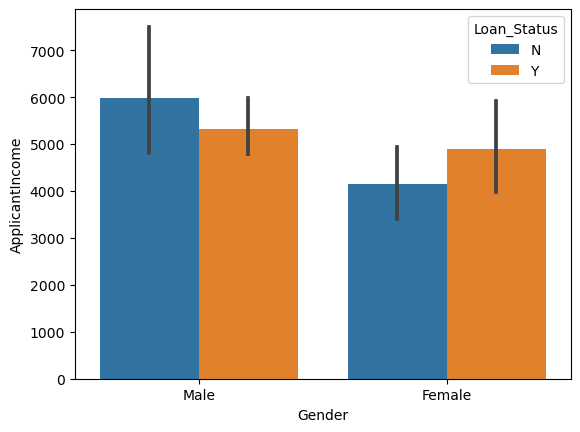

In [132]:
# Barplot => Gender, Application Income, Loan Status
sns.barplot(data, x="Gender", y="ApplicantIncome", hue="Loan_Status")

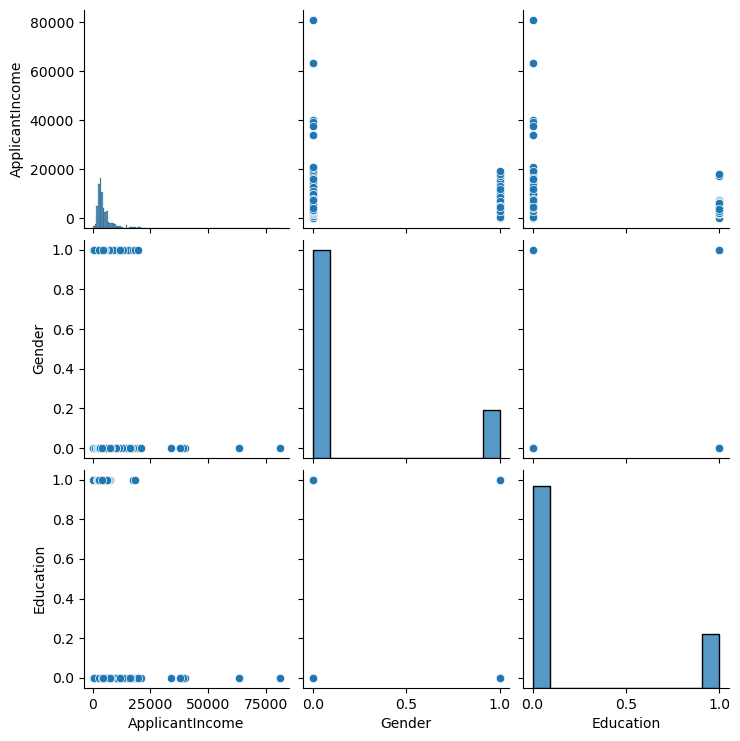

In [49]:
# Pairplot => Application Income, Gender, Education
sns.pairplot(data, vars=['ApplicantIncome', 'Gender', 'Education'])

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Loan_Status'}>]], dtype=object)

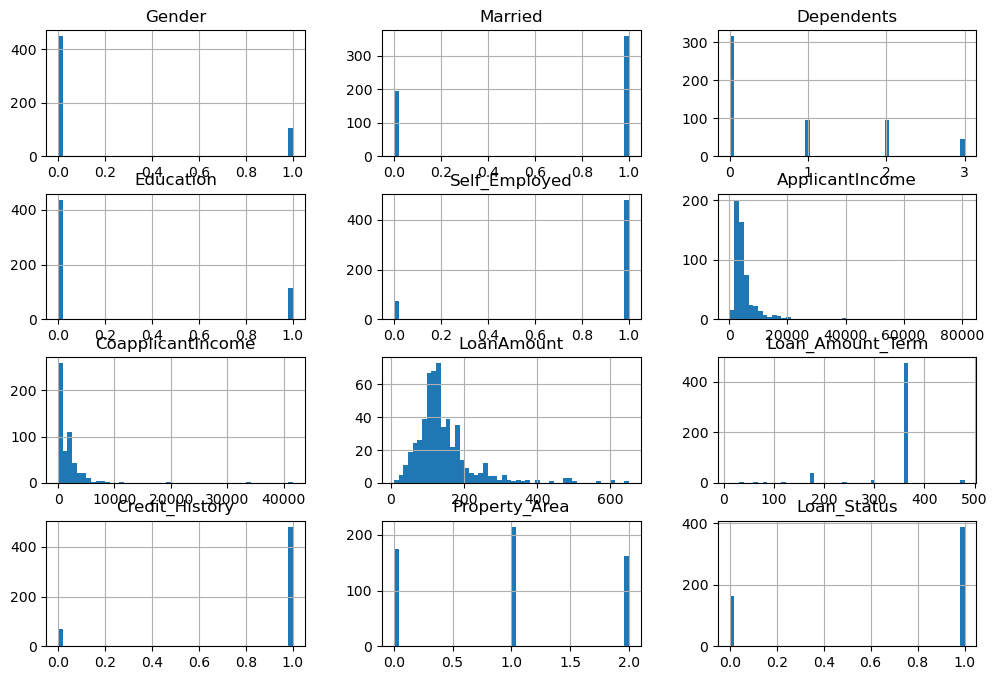

In [50]:
# hist() => All numeric variables
data.hist(bins=50, figsize=(12, 8))

Store feature matrix in x and target (response) variable in y vector


In [51]:
#Drop the loan_id column from the dataframe.
data=data.drop('Loan_ID',axis=1)

In [52]:
#Displaying the first 5 records after droping the loan_id column
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1.0,0,1,4583,1508.0,128.0,360.0,1.0,2,0
2,0,1,0.0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0.0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0.0,0,1,6000,0.0,141.0,360.0,1.0,0,1
5,0,1,2.0,0,0,5417,4196.0,267.0,360.0,1.0,0,1


In [53]:
#Creating the new data frame with all the attributes accept for class attribute
X=data.drop('Loan_Status',axis=1)

In [54]:
#Storing the Loan_status or class data in variable y
Y=data['Loan_Status']

In [55]:
#Print X dataframe
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1         1.0          0              1             4583   
2         0        1         0.0          0              0             3000   
3         0        1         0.0          1              1             2583   
4         0        0         0.0          0              1             6000   
5         0        1         2.0          0              0             5417   
..      ...      ...         ...        ...            ...              ...   
609       1        0         0.0          0              1             2900   
610       0        1         3.0          0              1             4106   
611       0        1         1.0          0              1             8072   
612       0        1         2.0          0              1             7583   
613       1        0         0.0          0              0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
#Displaying the class attribute values
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64


Feature scaling

In [57]:
#Selecting the columns which require scaling
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [58]:
#Importing library which is reqiured for scaling
from sklearn.preprocessing import StandardScaler

In [59]:
#Performing feature scaling 
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [60]:
#Displaying the dtaa stored in X after feature scaling
print(X.head

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1         1.0          0              1        -0.128694   
2         0        1         0.0          0              0        -0.394296   
3         0        1         0.0          1              1        -0.464262   
4         0        0         0.0          0              1         0.109057   
5         0        1         2.0          0              0         0.011239   
..      ...      ...         ...        ...            ...              ...   
609       1        0         0.0          0              1        -0.411075   
610       0        1         3.0          0              1        -0.208727   
611       0        1         1.0          0              1         0.456706   
612       0        1         2.0          0              1         0.374659   
613       1        0         0.0          0              0        -0.128694   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

 Splitting the dataset into train and test data and applying K-Fold Cross Validation

In [62]:
#Defing the function to  train and test data and applying K-Fold Cross Validation.
model_df={}
def model_val(model,X,Y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'{model} accuracy score is {accuracy_score(y_test,y_pred)}')

    #5 Fold Cross Validation.
    score=cross_val_score(model,X,Y,cv=5)
    print(f'{model} average cross val score is {np.mean(score)}')
    model_df[model]=round(np.mean(score)*100,2)
          


Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy score is 0.7927927927927928
LogisticRegression() average cross val score is 0.802964782964783


svm

In [64]:
from sklearn import svm

In [65]:
from sklearn import svm
model=svm.SVC()
model_val(model,X,Y)

SVC() accuracy score is 0.8018018018018018
SVC() average cross val score is 0.7920720720720721


Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy score is 0.7477477477477478
DecisionTreeClassifier() average cross val score is 0.7034070434070434


Random forest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model=RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy score is 0.7837837837837838
RandomForestClassifier() average cross val score is 0.7830466830466831


In [70]:
model_df

{LogisticRegression(): 80.3,
 SVC(): 79.21,
 DecisionTreeClassifier(): 70.34,
 RandomForestClassifier(): 78.3}

Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

Logistic Regression

In [72]:
log_red_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [73]:
log_red_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}
rs_log_reg=RandomizedSearchCV(LogisticRegression(),s
                  param_distributions=log_red_grid,
                  n_iter=20,cv=5,verbose=True)
rs_log_reg.fit(X,Y)

In [74]:
rs_log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
rs_log_reg.best_score_

0.802964782964783

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

SVM

In [77]:
svc_grid={'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [78]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                  n_iter=20,cv=5,verbose=True)
rs_svc.fit(X,Y)

In [79]:
rs_svc.fit(X,Y)

C:\Users\Lezan\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [80]:
rs_svc.best_score_

0.8066011466011467

In [81]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

Random FOrest Classifier

In [82]:
RandomForestClassifier()

RandomForestClassifier()

In [83]:
rf_grid={'n_estimators':np.arange(10,1000,10),
        'max_features':['auto','sqrt'],
        'max_depth':[None,3,5,10,20,30],
        'min_samples_split':[2,5,20,50,100],
        'min_samples_leaf':[1,2,5,10]}

In [84]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                  n_iter=20,cv=5,verbose=True)

In [85]:
rs_rf.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Lezan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lezan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lezan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Lezan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lezan\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [86]:
rs_rf.best_score_

0.8066011466011467

In [87]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

Save the model

In [88]:
X=data.drop('Loan_Status',axis=1)

In [89]:
Y=data['Loan_Status']

In [90]:
rf=RandomForestClassifier(n_estimators= 810,
 min_samples_split=50,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=20)

In [145]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=20, min_samples_split=50, n_estimators=810)

In [146]:
import joblib

In [147]:
joblib.dump(rf,'loan_status_prediction')

['loan_status_prediction']

In [148]:
model=joblib.load('loan_status_prediction')

In [93]:
import pandas as pd
df=pd.DataFrame({'Gender':1,
        'Married':1,
        'Dependents':0,
        'Education':2,
        'Self_Employed':2,
        'ApplicantIncome':2889,
        'CoapplicantIncome':0.0,
        'LoanAmount':45,
        'Loan_Amount_Term':180,
        'Credit_History':0,
        'Property_Area':1},index=[0]
        )

In [94]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,2,2,2889,0.0,45,180,0,1


In [97]:
result=model.predict(df)
print(result)
if result==1:
    print("Loan is approved")
else:
    print("Loan is not approved")

[0]


In [99]:
if result==1:
    print("Loan is approved")
else:
    print("Loan is not approved")

Loan is not approved
